In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


loan = pd.read_csv('loan.csv')

loan.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for l in range(loan.shape[1]):
    print('{}: {}'.format(l, loan.columns[l]))

0: id
1: member_id
2: loan_amnt
3: funded_amnt
4: funded_amnt_inv
5: term
6: int_rate
7: installment
8: grade
9: sub_grade
10: emp_title
11: emp_length
12: home_ownership
13: annual_inc
14: verification_status
15: issue_d
16: loan_status
17: pymnt_plan
18: url
19: desc
20: purpose
21: title
22: zip_code
23: addr_state
24: dti
25: delinq_2yrs
26: earliest_cr_line
27: inq_last_6mths
28: mths_since_last_delinq
29: mths_since_last_record
30: open_acc
31: pub_rec
32: revol_bal
33: revol_util
34: total_acc
35: initial_list_status
36: out_prncp
37: out_prncp_inv
38: total_pymnt
39: total_pymnt_inv
40: total_rec_prncp
41: total_rec_int
42: total_rec_late_fee
43: recoveries
44: collection_recovery_fee
45: last_pymnt_d
46: last_pymnt_amnt
47: next_pymnt_d
48: last_credit_pull_d
49: collections_12_mths_ex_med
50: mths_since_last_major_derog
51: policy_code
52: application_type
53: annual_inc_joint
54: dti_joint
55: verification_status_joint
56: acc_now_delinq
57: tot_coll_amt
58: tot_cur_bal
59: 

In [5]:
return_number = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

def convert_date(d):
    try:
        return datetime.date(year=int(d[4:]), month=return_number[d[:3]], day=1)
    except:
        pass

loan['issue_d'] = loan['issue_d'].apply(convert_date)
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(convert_date)

loan = loan[loan.issue_d < datetime.date(2015,7,1)]
loan = loan[loan.issue_d >= datetime.date(2010,1,1)]

loan = loan[loan.term == ' 36 months']

loan['earliest_cr_line'] = loan.apply(lambda x: (x['issue_d'] - x['earliest_cr_line']).days, axis=1)

In [6]:
loan.shape

(450510, 146)

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,earlist_cr_line
1165603,NaN,NaN,6000,6000,6000.0,36 months,11.53,197.95,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,5722
1166376,NaN,NaN,19000,19000,19000.0,36 months,8.18,596.97,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,7548
1166391,NaN,NaN,5400,5400,5400.0,36 months,17.57,194.07,D,D4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1187
1166446,NaN,NaN,6200,6200,6200.0,36 months,7.89,193.98,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,7213
1166703,NaN,NaN,9000,9000,9000.0,36 months,7.89,281.58,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,5509


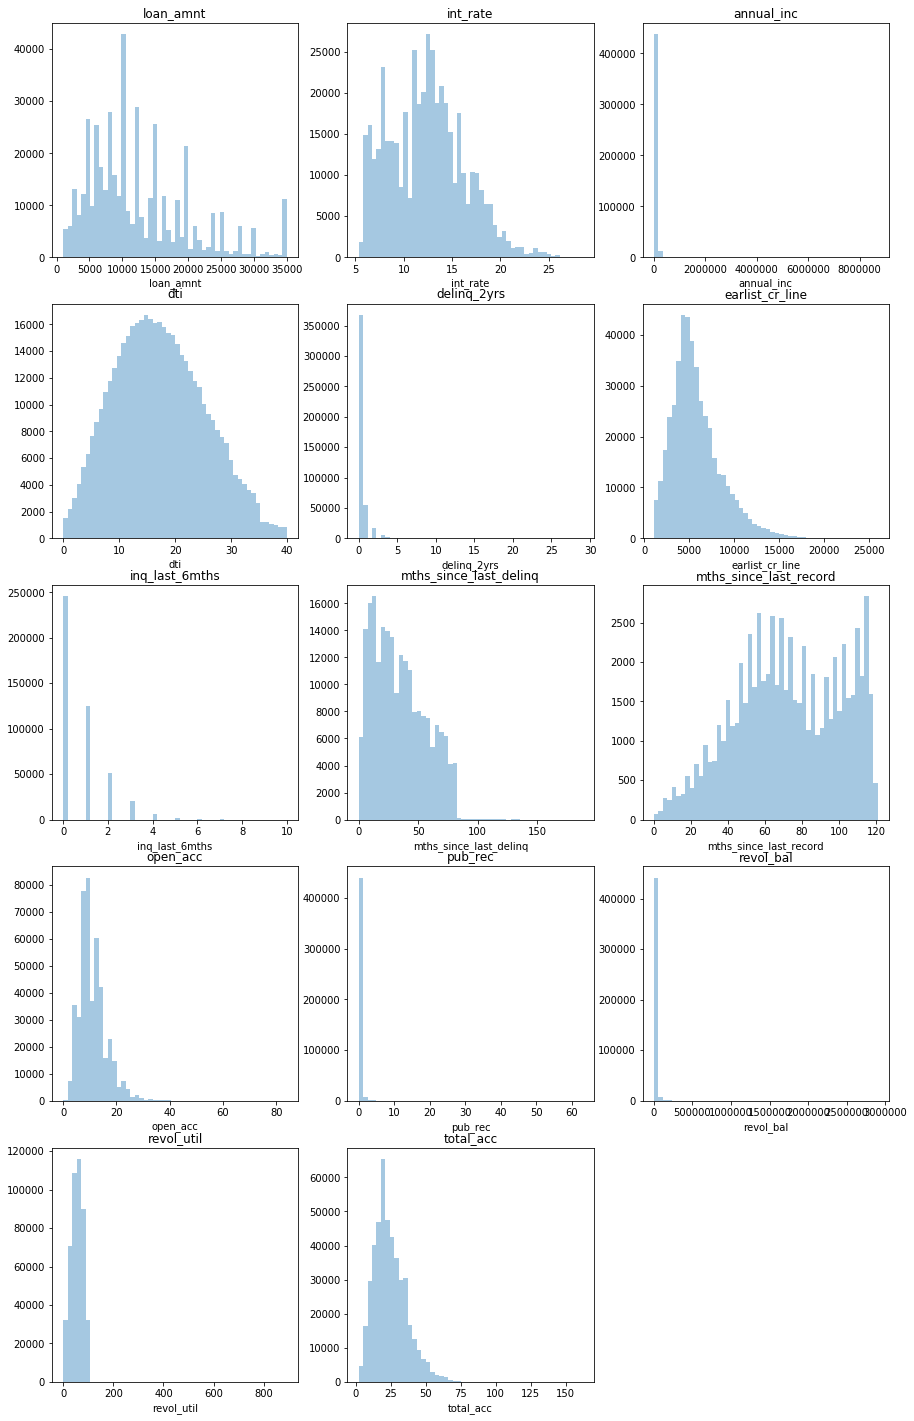

In [31]:
col_list = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'earlist_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

plt.figure(figsize=(15,25))

for i in range(len(col_list)):
    plt.subplot(5,3,i+1)
    plt.title(col_list[i])
    sns.distplot(loan[col_list[i]].dropna(), kde=False)
    
plt.show()

In [9]:
for l in range(loan.shape[1]):
    print('{}: {}'.format(l, loan.columns[l]))

0: id
1: member_id
2: loan_amnt
3: funded_amnt
4: funded_amnt_inv
5: term
6: int_rate
7: installment
8: grade
9: sub_grade
10: emp_title
11: emp_length
12: home_ownership
13: annual_inc
14: verification_status
15: issue_d
16: loan_status
17: pymnt_plan
18: url
19: desc
20: purpose
21: title
22: zip_code
23: addr_state
24: dti
25: delinq_2yrs
26: earliest_cr_line
27: inq_last_6mths
28: mths_since_last_delinq
29: mths_since_last_record
30: open_acc
31: pub_rec
32: revol_bal
33: revol_util
34: total_acc
35: initial_list_status
36: out_prncp
37: out_prncp_inv
38: total_pymnt
39: total_pymnt_inv
40: total_rec_prncp
41: total_rec_int
42: total_rec_late_fee
43: recoveries
44: collection_recovery_fee
45: last_pymnt_d
46: last_pymnt_amnt
47: next_pymnt_d
48: last_credit_pull_d
49: collections_12_mths_ex_med
50: mths_since_last_major_derog
51: policy_code
52: application_type
53: annual_inc_joint
54: dti_joint
55: verification_status_joint
56: acc_now_delinq
57: tot_coll_amt
58: tot_cur_bal
59: 

In [20]:
loan.acc_now_delinq.value_counts()

0.0     448636
1.0       1753
2.0         97
3.0         17
4.0          4
14.0         1
6.0          1
5.0          1
Name: acc_now_delinq, dtype: int64

In [44]:
loan[loan.annual_inc > 1000000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,earlist_cr_line
1177202,NaN,NaN,3500,3500,3500.0,36 months,12.29,116.74,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,10074
1193903,NaN,NaN,35000,35000,35000.0,36 months,7.89,1095.00,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,9861
1197834,NaN,NaN,20000,20000,20000.0,36 months,6.24,610.62,A,A2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,6360
1222308,NaN,NaN,24000,24000,24000.0,36 months,5.93,729.37,A,A1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,6969
1226731,NaN,NaN,15000,15000,15000.0,36 months,8.18,471.30,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2861
1229945,NaN,NaN,28000,28000,28000.0,36 months,7.89,876.00,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,4930
1245005,NaN,NaN,7500,7500,7500.0,36 months,6.92,231.31,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,9221
1248085,NaN,NaN,25000,25000,25000.0,36 months,16.99,891.20,D,D3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,6847
1257522,NaN,NaN,7000,7000,7000.0,36 months,9.99,225.84,B,B3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,7152
1270516,NaN,NaN,35000,35000,35000.0,36 months,7.89,1095.00,A,A5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,8186


AttributeError: 'DataFrame' object has no attribute 'fico_range_low'